# US Raspberry market analysis

TERMINAL MARKET

    Retail price
  

## Import and cleaning data

In [1]:
# Import data
import pandas as pd
import datetime
pd.set_option('display.max_columns',None) ## Display all columns in pandas dataframe  
pd.set_option('display.max_rows',None) ## Display all rows in pandas dataframe 

file_name = 'US Raspberry Prices - Terminal Market.xlsx'
prices = pd.DataFrame()
prices=pd.read_excel(file_name\
                    ,header=0
                    ,usecols= ['City Name',\
                                'Package',\
                                'Variety',\
                                'Origin',\
                                'Item Size',\
                                'Quality',\
                                'Condition',\
                                'Type',\
                                'Appearance',\
                                'Date',\
                                'Low Price',\
                                'High Price'])
# Format dates, some american, some european
date_formated = prices['Date']
dates1 = pd.to_datetime(date_formated[date_formated.str.len()==10])
dates2 = pd.to_datetime(date_formated[date_formated.str.len()!=10].astype('str').str.strip().str[0:10],format='%Y-%d-%m')
dates_formated = dates1.append(dates2,ignore_index=False,verify_integrity=True).sort_index()
prices['Date']=dates_formated
prices.sort_values('Date',inplace=True)

Dimension reduction
    
    FIELD	    FILTER
    City Name	All
    Package	    flats 12 6-oz cups with lids
    Variety	    RED
    Origin	    MEXICO
    Quality	    Blank
    Condition	Blank
    Appearance	Blank
    Type        Blank
    Item Size   Lge
    Date
    Low Price	
    High Price	

In [2]:
# Dimension reduction
prices_clean = prices [(prices['Origin']=='MEXICO')\
         & (prices['Package']=='flats 12 6-oz cups with lids')\
         & (prices['Variety']=='RED')\
         & ((pd.isna(prices['Quality']))) 
         & (pd.isna(prices['Condition']))\
         #& (prices['Item Size']=='lge')\
         & ((pd.isna(prices['Item Size'])))\
         & (pd.isna(prices['Type']))\
         & ((pd.isna(prices['Appearance']))) ]
# Drop duplicates
prices_clean.dropna(axis=1,thresh=500,inplace=True)
prices_clean.dropna(axis=0,inplace=True)
prices_clean.drop_duplicates(subset=['City Name','Date'], inplace=True)

/home/matozqui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/matozqui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/matozqui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [3]:
prices_clean[prices_clean['City Name']=='SAN FRANCISCO'].head(10)

,City Name,Package,Variety,Date,Low Price,High Price,Origin
155187,SAN FRANCISCO,flats 12 6-oz cups with lids,RED,1998-01-02,24.5,26.0,MEXICO
155190,SAN FRANCISCO,flats 12 6-oz cups with lids,RED,1998-01-05,31.0,31.0,MEXICO
155210,SAN FRANCISCO,flats 12 6-oz cups with lids,RED,1998-03-19,32.5,33.0,MEXICO
155212,SAN FRANCISCO,flats 12 6-oz cups with lids,RED,1998-03-20,32.5,33.0,MEXICO
155215,SAN FRANCISCO,flats 12 6-oz cups with lids,RED,1998-03-24,35.5,35.5,MEXICO
155219,SAN FRANCISCO,flats 12 6-oz cups with lids,RED,1998-03-30,38.5,39.5,MEXICO
155221,SAN FRANCISCO,flats 12 6-oz cups with lids,RED,1998-03-31,38.5,39.5,MEXICO
155223,SAN FRANCISCO,flats 12 6-oz cups with lids,RED,1998-04-01,38.5,39.5,MEXICO
155224,SAN FRANCISCO,flats 12 6-oz cups with lids,RED,1998-04-02,38.0,39.0,MEXICO
155225,SAN FRANCISCO,flats 12 6-oz cups with lids,RED,1998-04-03,38.5,39.5,MEXICO


In [4]:
import missingno as msno
msno.matrix(prices_clean)

In [5]:
prices_clean.groupby(['Date','City Name','Package','Variety']).count().shape

(6440, 3)

In [6]:
prices_clean.shape

(6440, 7)

In [7]:
prices_clean['City Name'].value_counts()

SAN FRANCISCO    1889
MIAMI             923
ST. LOUIS         800
ATLANTA           743
SEATTLE           560
PITTSBURGH        538
CHICAGO           285
LOS ANGELES       160
PHILADELPHIA      152
BOSTON            142
TORONTO, ONT       70
BALTIMORE          58
NEW YORK           52
MONTREAL, QUE      31
COLUMBIA           20
DALLAS             17
Name: City Name, dtype: int64

In [8]:
prices_sf=prices_clean[prices_clean['City Name']=='SAN FRANCISCO']

In [9]:
prices_sf.head()

,City Name,Package,Variety,Date,Low Price,High Price,Origin
155187,SAN FRANCISCO,flats 12 6-oz cups with lids,RED,1998-01-02,24.5,26.0,MEXICO
155190,SAN FRANCISCO,flats 12 6-oz cups with lids,RED,1998-01-05,31.0,31.0,MEXICO
155210,SAN FRANCISCO,flats 12 6-oz cups with lids,RED,1998-03-19,32.5,33.0,MEXICO
155212,SAN FRANCISCO,flats 12 6-oz cups with lids,RED,1998-03-20,32.5,33.0,MEXICO
155215,SAN FRANCISCO,flats 12 6-oz cups with lids,RED,1998-03-24,35.5,35.5,MEXICO


In [10]:
prices_sf['Avg Price']=(prices_sf['Low Price']+prices_sf['High Price'])/2

/home/matozqui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
prices_sf.drop(['City Name','Package','Variety','Low Price','High Price','Origin'], axis=1, inplace=True)#.sort('Date',ascending=True,inplace=True)

/home/matozqui/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
prices_sf.set_index('Date',inplace=True)

/home/matozqui/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


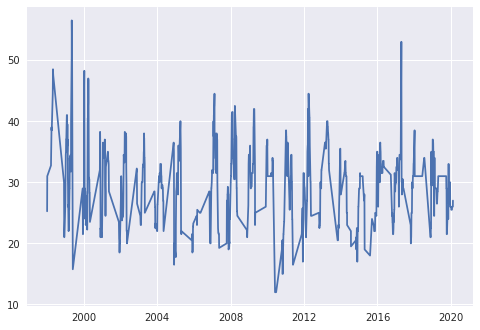

In [13]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(prices_sf);

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

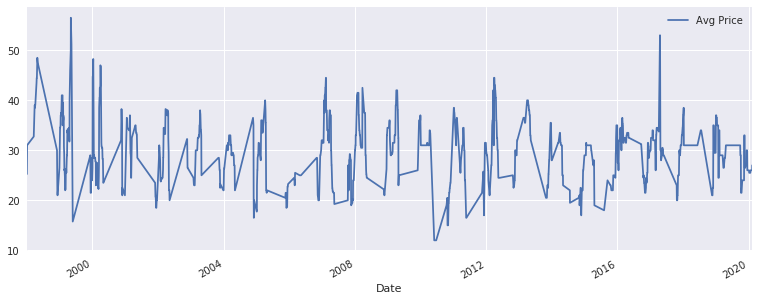

In [15]:
fig, ax = plt.subplots(figsize= (13,5))
prices_sf.plot(ax=ax);

In [16]:
prices_sf.resample('W').mean().to_excel('mean_week.xlsx')

In [17]:
prices_sf.resample('M').mean().truncate(before='2015').isna().count()

Avg Price    62
dtype: int64

In [18]:
prices_sf.resample('M').mean().to_excel('mean_month.xlsx')

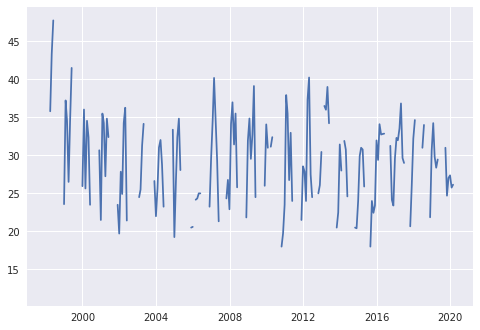

In [19]:
plt.plot(prices_sf.resample('M').mean())

In [20]:
prices_sf.resample('M').mean().truncate(after='2020',before='2019')

,Avg Price
Date,
2019-01-31,34.238095
2019-02-28,29.842105
2019-03-31,28.375000
2019-04-30,29.454545
2019-05-31,NaN
2019-06-30,NaN
2019-07-31,NaN
2019-08-31,NaN
2019-09-30,31.000000


In [21]:
import datetime
datetime.date(2010, 6, 16).strftime("%V")

'24'

In [22]:
prices_sf.resample('W').mean().truncate(after='2011',before='2010').\
                                reset_index()['Date'].apply\
                                (lambda x: x.weekofyear)

0     53
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
50    50
51    51
Name: Date, dtype: int64

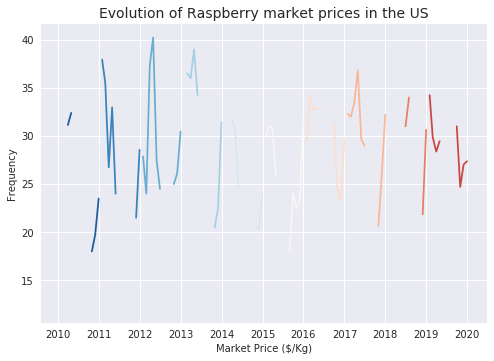

In [23]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

with sns.color_palette("RdBu_r",11):
    ax = plt.plot(prices_sf.resample('M').mean().truncate(after='2011',before='2010'),label='2010')
    ax = plt.plot(prices_sf.resample('M').mean().truncate(after='2012',before='2011'),label='2011')
    ax = plt.plot(prices_sf.resample('M').mean().truncate(after='2013',before='2012'),label='2012')
    ax = plt.plot(prices_sf.resample('M').mean().truncate(after='2014',before='2013'),label='2013')
    ax = plt.plot(prices_sf.resample('M').mean().truncate(after='2015',before='2014'),label='2014')
    ax = plt.plot(prices_sf.resample('M').mean().truncate(after='2016',before='2015'),label='2015')
    ax = plt.plot(prices_sf.resample('M').mean().truncate(after='2017',before='2016'),label='2016')
    ax = plt.plot(prices_sf.resample('M').mean().truncate(after='2018',before='2017'),label='2017')
    ax = plt.plot(prices_sf.resample('M').mean().truncate(after='2019',before='2018'),label='2018')
    ax = plt.plot(prices_sf.resample('M').mean().truncate(after='2020',before='2019'),label='2019')
    #ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2021',before='2020'),label='2020', shade=True)
    plt.title('Evolution of Raspberry market prices in the US', fontsize=14)
    plt.xlabel('Market Price ($/Kg)', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.savefig('./Evolution_Raspberry_US.png')
    plt.show()

In [24]:
prices_sf_normalized=prices_sf.resample('M').mean().truncate(before='2011')

In [25]:
prices_sf_normalized.dropna(inplace=True)

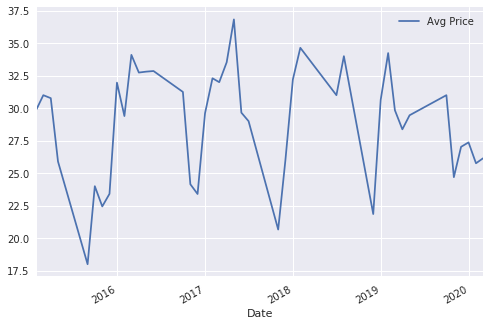

In [26]:
prices_sf_normalized.truncate(before='2015').plot()

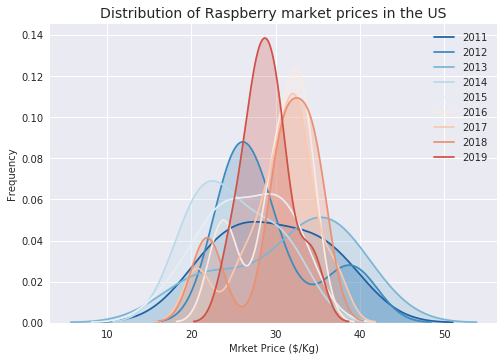

In [27]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

with sns.color_palette("RdBu_r",10):
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2011',before='2010'),label='2010', shade=True)
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2012',before='2011'),label='2011', shade=True)
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2013',before='2012'),label='2012', shade=True)
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2014',before='2013'),label='2013', shade=True)
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2015',before='2014'),label='2014', shade=True)
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2016',before='2015'),label='2015', shade=True)
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2017',before='2016'),label='2016', shade=True)
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2018',before='2017'),label='2017', shade=True)
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2019',before='2018'),label='2018', shade=True)
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2020',before='2019'),label='2019', shade=True)
    #ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2021',before='2020'),label='2020', shade=True)
    plt.title('Distribution of Raspberry market prices in the US', fontsize=14)
    plt.xlabel('Mrket Price ($/Kg)', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.savefig('./Distribution_Raspberry_US.png')
    plt.show()

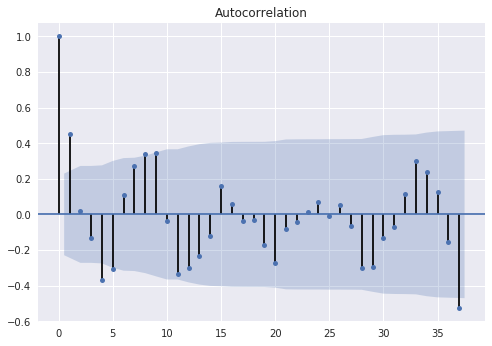

In [28]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(prices_sf_normalized,lags=37,unbiased=True);

In [29]:
(prices_sf_normalized['Avg Price'].truncate(after='2012',before='2010'))

Date
2011-01-31    37.928571
2011-02-28    35.500000
2011-03-31    26.750000
2011-04-30    32.966667
2011-05-31    24.000000
2011-11-30    21.500000
2011-12-31    28.557692
Name: Avg Price, dtype: float64

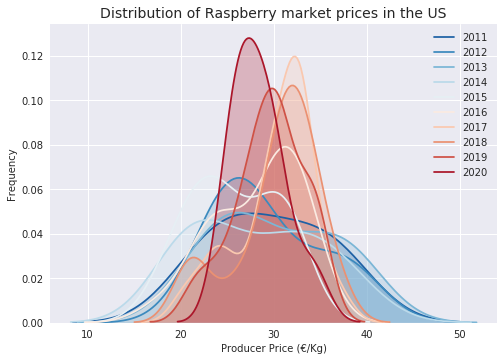

In [30]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

with sns.color_palette("RdBu_r",10):
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2012',before='2010'),label='2011', shade=True)
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2013',before='2011'),label='2012', shade=True)
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2014',before='2012'),label='2013', shade=True)
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2015',before='2013'),label='2014', shade=True)
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2016',before='2014'),label='2015', shade=True)
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2017',before='2015'),label='2016', shade=True)
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2018',before='2016'),label='2017', shade=True)
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2019',before='2017'),label='2018', shade=True)
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2020',before='2018'),label='2019', shade=True)
    ax = sns.kdeplot(prices_sf_normalized['Avg Price'].truncate(after='2021',before='2019'),label='2020', shade=True)
    plt.title('Distribution of Raspberry market prices in the US', fontsize=14)
    plt.xlabel('Producer Price (€/Kg)', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.savefig('./Distribution_Raspberry_US.png')
    plt.show()